# CIFAR 10 - Functional API Modeling

* Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.9.2'

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


# II. Data Preprocessing

> ## 1) Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. Keras Functional API Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의

In [12]:
%%time

from tensorflow.keras import models
from tensorflow.keras import layers

input_img = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid')(input_img)
x = layers.ReLU()(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid')(x)
x = layers.ReLU()(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid')(x)
x = layers.ReLU()(x)


x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(64)(x)
x = layers.ReLU()(x)

x = layers.Dense(10)(x)
output_y_hat = layers.Activation('softmax')(x)

CIFAR = models.Model(input_img, output_y_hat)

CPU times: user 59.6 ms, sys: 952 µs, total: 60.5 ms
Wall time: 61.8 ms


* 모델 구조 확인

In [13]:
CIFAR.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 re_lu_4 (ReLU)              (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 re_lu_5 (ReLU)              (None, 13, 13, 64)        0         
                                                           

> ## 2) Model Compile

* 모델 학습방법 설정

In [14]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 8분

In [15]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 12s 9ms/step - loss: 1.7787 - accuracy: 0.3403 - val_loss: 1.4705 - val_accuracy: 0.4636
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 1.4080 - accuracy: 0.4910 - val_loss: 1.3085 - val_accuracy: 0.5382
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 1.2799 - accuracy: 0.5436 - val_loss: 1.1992 - val_accuracy: 0.5771
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 1.1920 - accuracy: 0.5742 - val_loss: 1.1311 - val_accuracy: 0.6072
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 1.1299 - accuracy: 0.5997 - val_loss: 1.0588 - val_accuracy: 0.6278
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 1.0716 - accuracy: 0.6187 - val_loss: 1.0346 - val_accuracy: 0.6347
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 1.0301 - accuracy: 0.6363 - val_loss: 0.9792 - val_accuracy: 0.657

> ## 4) 학습 결과 시각화

* Loss Visualization

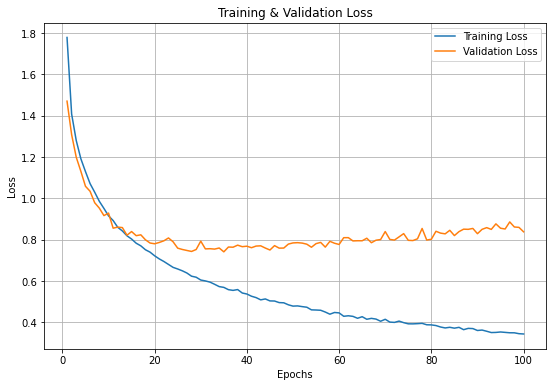

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_CIFAR.history['loss'])
plt.plot(epochs, Hist_CIFAR.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [18]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.8623 - accuracy: 0.7552
Loss = 0.86232
Accuracy = 0.75520


# IV. 성능평가

> ## 1) Label Name 지정

In [19]:
import numpy as np

CLASSES = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

preds = CIFAR.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step


> ## 2) 비교 시각화

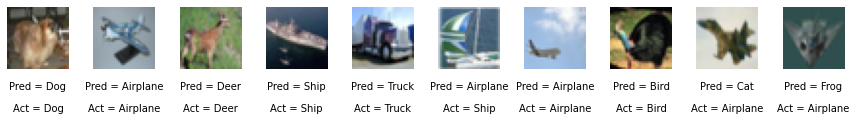

In [20]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            'Pred = ' + str(preds_single[idx]), 
            fontsize = 10, 
            ha = 'center', 
            transform = ax.transAxes) 
    ax.text(0.5, -0.7, 
            'Act = ' + str(actual_single[idx]), 
            fontsize = 10, 
            ha = 'center', 
            transform = ax.transAxes)
    ax.imshow(img)

# 
# 
# 
# The End
# 
# 
# 